# Moon Training Set

In [196]:
import matplotlib.pyplot as plt
import pandas as pd

In [197]:
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=10000, noise=0.4, random_state=42)

In [198]:
df = pd.DataFrame(X)
df

0         1
0     0.940291  0.122306
1     0.124540 -0.424775
2     0.261988  0.508414
3    -0.495238  0.072589
4    -0.879413  0.549373
...        ...       ...
9995  0.406096  0.389485
9996  0.188299  0.755326
9997 -0.241780  0.209572
9998  0.906796  0.549582
9999  2.088371 -0.050507

[10000 rows x 2 columns]

# Visualize

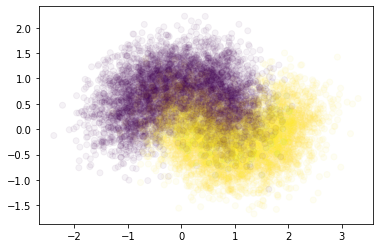

In [199]:
plt.scatter(df[0], df[1], alpha=0.05, c=y)

# Training

## Visualize Simple Decision Tree

In [200]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [201]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier, export_graphviz

tree_clf = DecisionTreeClassifier(max_depth=1)
tree_clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=1)

In [186]:
import pydot

(graph,) = pydot.graph_from_dot_file('moon_tree.dot')
graph.write_png('moon_tree.png')

export_graphviz(
    tree_clf,
    out_file='moon_tree.dot',
    feature_names=['X', 'Y'],
    rounded=True,
    filled=True
)

In [187]:
cross_val_score(tree_clf, X_train, y_train, cv=5)

array([0.74776119, 0.78134328, 0.77462687, 0.78880597, 0.7619403 ])

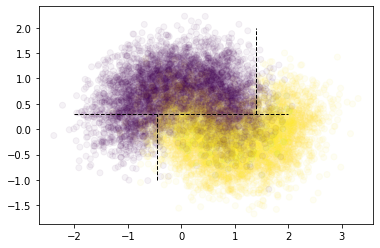

In [188]:
plt.scatter(df[0], df[1], alpha=0.05, c=y)
plt.plot([-2, 2], [0.302, 0.302], "k--", linewidth=1)
plt.plot([-0.46, -0.46], [-1, 0.302], "k--", linewidth=1)
plt.plot([1.398, 1.398], [0.302, 2], "k--", linewidth=1)

## Training Decision Tree with GridSearch

In [189]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'max_depth': list(range(2, 100)), 'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20, 30, 50]}
]

decision_tree_clf = DecisionTreeClassifier()
grid_search = GridSearchCV(decision_tree_clf, param_grid, cv=5, n_jobs=12)
grid_search.fit(X_train, y_train)
grid_search.best_params_

{'max_depth': 9, 'max_leaf_nodes': 30}

In [190]:
grid_search.best_estimator_

DecisionTreeClassifier(max_depth=9, max_leaf_nodes=30)

In [191]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(mean_score, params)

0.7708955223880597 {'max_depth': 1, 'max_leaf_nodes': 10}
0.7708955223880597 {'max_depth': 1, 'max_leaf_nodes': 30}
0.7708955223880597 {'max_depth': 1, 'max_leaf_nodes': 50}
0.7708955223880597 {'max_depth': 1, 'max_leaf_nodes': 100}
0.7708955223880597 {'max_depth': 1, 'max_leaf_nodes': 200}
0.7708955223880597 {'max_depth': 1, 'max_leaf_nodes': 500}
0.7708955223880597 {'max_depth': 1, 'max_leaf_nodes': 1000}
0.7708955223880597 {'max_depth': 1, 'max_leaf_nodes': 2000}
0.8541791044776119 {'max_depth': 2, 'max_leaf_nodes': 10}
0.8541791044776119 {'max_depth': 2, 'max_leaf_nodes': 30}
0.8541791044776119 {'max_depth': 2, 'max_leaf_nodes': 50}
0.8541791044776119 {'max_depth': 2, 'max_leaf_nodes': 100}
0.8541791044776119 {'max_depth': 2, 'max_leaf_nodes': 200}
0.8541791044776119 {'max_depth': 2, 'max_leaf_nodes': 500}
0.8541791044776119 {'max_depth': 2, 'max_leaf_nodes': 1000}
0.8541791044776119 {'max_depth': 2, 'max_leaf_nodes': 2000}
0.8541791044776119 {'max_depth': 3, 'max_leaf_nodes': 10}


# Test prediction score

In [192]:
best_tree_clf = DecisionTreeClassifier(max_depth=9, max_leaf_nodes=30)

best_tree_clf.fit(X_train, y_train)
y_pred = best_tree_clf.predict(X_test)

In [193]:
from sklearn.metrics import precision_score, recall_score, accuracy_score
precision_score(y_test, y_pred)

0.8600493218249076

In [194]:
recall_score(y_test, y_pred)

0.8611111111111112

In [195]:
accuracy_score(y_test, y_pred)

0.863030303030303